In [12]:
import numpy as np
import matplotlib.pyplot as plt


def visualize_weights(net, layer_name, padding=0, filename=''):
    # The parameters are a list of [weights, biases]
    data = np.copy(net.params[layer_name][0].data)
    # N is the total number of convolutions
    N = data.shape[0]*data.shape[1]
    # Ensure the resulting image is square
    filters_per_row = int(np.ceil(np.sqrt(N)))
    # Assume the filters are square
    filter_size = data.shape[2]
    # Size of the result image including padding
    result_size = filters_per_row*(filter_size + padding) - padding
    # Initialize result image to all zeros
    result = np.zeros((result_size, result_size))

    # Tile the filters into the result image
    filter_x = 0
    filter_y = 0
    for n in range(data.shape[0]):
        for c in range(data.shape[1]):
            if filter_x == filters_per_row:
                filter_y += 1
                filter_x = 0
            for i in range(filter_size):
                for j in range(filter_size):
                    result[filter_y*(filter_size + padding) + i, filter_x*(filter_size + padding) + j] = data[n, c, i, j]
            filter_x += 1

    # Normalize image to 0-1
    min = result.min()
    max = result.max()
    result = (result - min) / (max - min)

    # Plot figure
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(result, cmap='gray', interpolation='nearest')

    # Save plot if filename is set
    if filename != '':
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)

    plt.show()



data	(1, 3, 512, 512)
data_input_0_split_0	(1, 3, 512, 512)
data_input_0_split_1	(1, 3, 512, 512)
data_input_0_split_2	(1, 3, 512, 512)
data_input_0_split_3	(1, 3, 512, 512)
data_input_0_split_4	(1, 3, 512, 512)
conv1	(1, 24, 256, 256)
pool1	(1, 24, 128, 128)
pool1_pool1_0_split_0	(1, 24, 128, 128)
pool1_pool1_0_split_1	(1, 24, 128, 128)
branch1_1_conv1	(1, 24, 64, 64)
branch1_1_conv2	(1, 116, 64, 64)
branch1_2_conv1	(1, 116, 128, 128)
branch1_2_conv2	(1, 116, 64, 64)
branch1_2_conv3	(1, 116, 64, 64)
concat1	(1, 232, 64, 64)
shuffle1	(1, 232, 64, 64)
branch2_1	(1, 58, 64, 64)
branch2_2	(1, 174, 64, 64)
branch2_2_conv1	(1, 116, 64, 64)
branch2_2_conv2	(1, 116, 64, 64)
branch2_2_conv3	(1, 116, 64, 64)
concat2	(1, 174, 64, 64)
shuffle2	(1, 174, 64, 64)
branch3_1	(1, 58, 64, 64)
branch3_2	(1, 116, 64, 64)
branch3_2_conv1	(1, 116, 64, 64)
branch3_2_conv2	(1, 116, 64, 64)
branch3_2_conv3	(1, 116, 64, 64)
concat3	(1, 174, 64, 64)
shuffle3	(1, 174, 64, 64)
branch4_1	(1, 58, 64, 64)
branch4_2	(

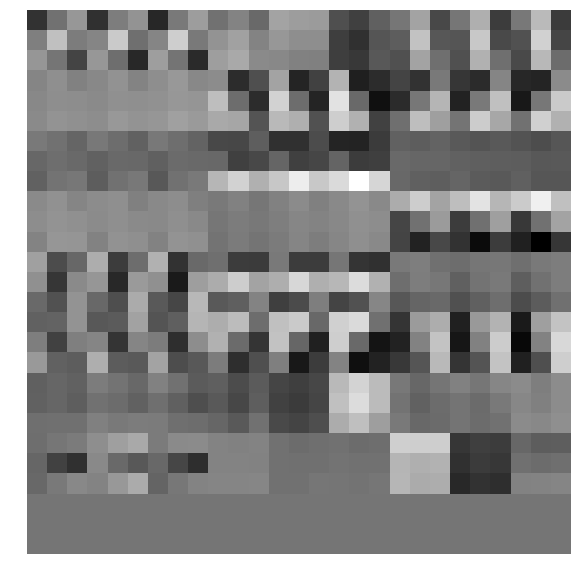

In [13]:
import sys

# Make sure that caffe is on the python path:
caffe_root = '/home/zhangruijun/RefineDet'
import os
os.chdir(caffe_root)
import sys
sys.path.insert(0, 'python')
import caffe
model_def = '/home/zhangruijun/RefineDet/jobs/refineShuffleDet/deploy.prototxt'
model_weights = '/home/zhangruijun/RefineDet/jobs/refineShuffleDet/shuffleDet_iter_540000.caffemodel'


# Load model
net = caffe.Net(model_def,
                model_weights,
                caffe.TEST)
params = list(net.blobs.keys())

for layer_name,blob in net.blobs.iteritems():
    print layer_name + '\t'+str(blob.data.shape)
    
visualize_weights(net,'conv1')